*GROUP 5 - ARIMA*
---
---
* Nguyễn Nhất Thưởng - 20522000
* Nguyễn Quang Hoà - 20521331
* Kiều Xuân Diệu Hương - 20521381
---

Tóm Tắt:


**IMPORT LIBRARY**
---
---


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib as plt
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error

**READ DATA**
---
---

In [3]:
df=pd.read_csv('/content/drive/MyDrive/Team5-PAPERREPORT/Data/DATA(2002-2022).csv',parse_dates = ['Date'],index_col = ['Date'])
df

,Prices
Date,
2002-01-01,4170449.50
2002-01-02,4198629.19
2002-01-03,4206113.25
2002-01-04,4190692.00
2002-01-07,4203514.59
...,...
2022-04-04,44102530.37
2022-04-05,44470144.87
2022-04-06,44137702.89


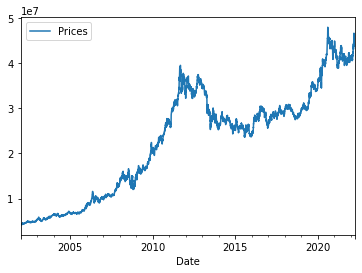

In [4]:
df.plot()

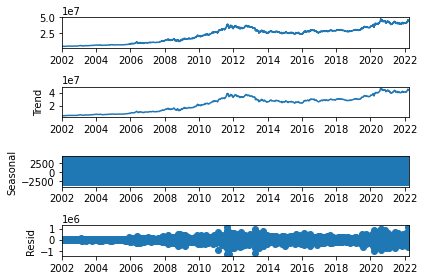

In [5]:
import statsmodels.api as sm
decomposition = sm.tsa.seasonal_decompose(df,model = 'active')
fig = decomposition.plot()

In [6]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(df)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -0.370760
p-value: 0.914868


In [7]:
len(df)

5289

In [8]:
train = df[:3702]
test = df[3702:]


In [9]:
import itertools


In [10]:
p = range(0,8)
q = range(0,8)
d = range(0,2)

In [11]:
pdq_combination = list(itertools.product(p,d,q))

In [12]:
len(pdq_combination)

128

In [13]:
rmse=[]
order1=[]

In [14]:
for pdq in pdq_combination:
  try:
    model = ARIMA(train,order=pdq).fit()
    pred=model.predict(start=len(train),end=(len(df)-1))
    error = np.sqrt(mean_squared_error(test,pred))
    order1.append(pdq)
    rmse.append(error)
  except:
    continue

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency B will be use

In [15]:
results = pd.DataFrame(index = order1,data=rmse,columns = ['RMSE'])

In [16]:
results.to_csv('ARima_result.csv')

In [17]:
model = ARIMA(train,order=(3,0,4)).fit()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency B will be use

In [18]:
model.summary()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/arima_model.py:1521: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(-inv(hess)))


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                 Prices   No. Observations:                 3702
Model:                     ARMA(3, 4)   Log Likelihood              -51203.463
Method:                       css-mle   S.D. of innovations         245360.001
Date:                Thu, 05 Jan 2023   AIC                         102424.927
Time:                        00:38:03   BIC                         102480.877
Sample:                    01-01-2002   HQIC                        102444.838
                         - 03-09-2016                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const          1.79e+07        nan        nan        nan         nan         nan
ar.L1.Prices    -0.8521        nan        nan        nan         nan         nan
ar.L2.Prices     0.9257        nan        nan        nan         nan         nan
ar.L3.Prices     0.9263        nan        nan        nan         nan         nan
ma.L1.Prices     1.8576      0.016    112.994      0.000       1.825       1.890
ma.L2.Prices     0.9081      0.035     26.284      0.000       0.840       0.976
ma.L3.Prices    -0.0459      0.034     -1.333      0.183      -0.113       0.022
ma.L4.Prices    -0.0309      0.016     -1.898      0.058      -0.063       0.001
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0000           -0.0000j            1.0000           -0.0000
AR.2           -0.9997           -0.2831j            1.0390           -0.4561
AR.3           -0.9997           +0.2831j            1.0390            0.4561
MA.1           -1.0125           -0.2755j            1.0493           -0.4577
MA.2           -1.0125           +0.2755j            1.0493            0.4577
MA.3            5.6974           -0.0000j            5.6974           -0.0000
MA.4           -5.1556           -0.0000j            5.1556           -0.5000
-----------------------------------------------------------------------------
"""

# Mục mới

In [19]:
pred = model.predict(start=len(train),end=(len(df)-1))
pred


2016-03-10    2.778308e+07
2016-03-11    2.780303e+07
2016-03-14    2.779530e+07
2016-03-15    2.780577e+07
2016-03-16    2.779353e+07
                  ...     
2022-04-04    2.779272e+07
2022-04-05    2.779271e+07
2022-04-06    2.779271e+07
2022-04-07    2.779270e+07
2022-04-08    2.779270e+07
Freq: B, Length: 1587, dtype: float64

In [20]:
len(pred)

1587

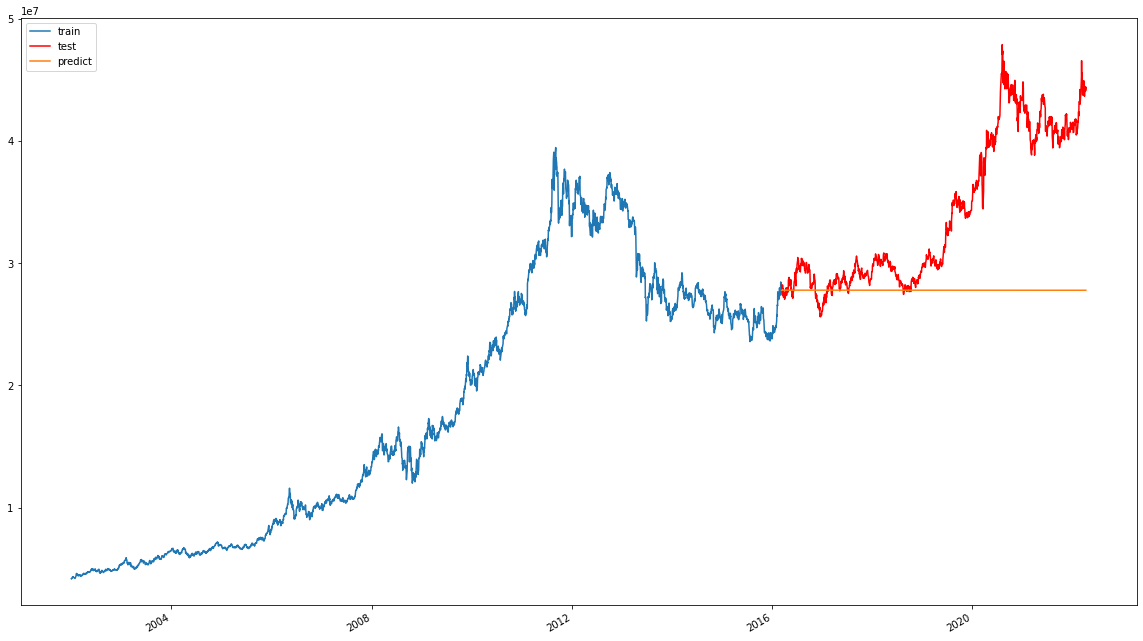

In [21]:
# Importing libraries
import matplotlib.pyplot as plt
import numpy as np
# train.plot(legend = True,label = 'train',figsize = (10,6))
# pred.plot(legend = True,label = 'predict',figsize = (10,6))
# test.plot(legend = True,label = 'test',figsize = (10,6))

plt.plot(train.index, train['Prices'],label = 'train')
plt.plot(test.index, test['Prices'], color='r',label = 'test')
pred.plot(label = 'predict',figsize = (20,12))
plt.legend()

In [22]:
model = ARIMA(df,order=(3,0,4)).fit()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency B will be use

In [23]:
print(model.summary())

                              ARMA Model Results                              
Dep. Variable:                 Prices   No. Observations:                 5289
Model:                     ARMA(3, 4)   Log Likelihood              -73667.724
Method:                       css-mle   S.D. of innovations         270694.849
Date:                Thu, 05 Jan 2023   AIC                         147353.447
Time:                        00:38:07   BIC                         147412.608
Sample:                    01-01-2002   HQIC                        147374.123
                         - 04-08-2022                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const         2.274e+07    1.6e+07      1.425      0.154   -8.54e+06     5.4e+07
ar.L1.Prices     0.8611      0.001    741.601      0.000       0.859       0.863
ar.L2.Prices     0.5938      0.002    267.84

In [24]:
prediction = model.predict(len(df),len(df) + 30)
prediction

2022-04-11    4.436432e+07
2022-04-12    4.437891e+07
2022-04-13    4.436418e+07
2022-04-14    4.436301e+07
2022-04-15    4.435504e+07
2022-04-18    4.435419e+07
2022-04-19    4.434925e+07
2022-04-20    4.434812e+07
2022-04-21    4.434460e+07
2022-04-22    4.434315e+07
2022-04-25    4.434032e+07
2022-04-26    4.433862e+07
2022-04-27    4.433615e+07
2022-04-28    4.433429e+07
2022-04-29    4.433199e+07
2022-05-02    4.433004e+07
2022-05-03    4.432784e+07
2022-05-04    4.432583e+07
2022-05-05    4.432368e+07
2022-05-06    4.432164e+07
2022-05-09    4.431952e+07
2022-05-10    4.431746e+07
2022-05-11    4.431535e+07
2022-05-12    4.431328e+07
2022-05-13    4.431118e+07
2022-05-16    4.430911e+07
2022-05-17    4.430702e+07
2022-05-18    4.430494e+07
2022-05-19    4.430285e+07
2022-05-20    4.430077e+07
2022-05-23    4.429868e+07
Freq: B, dtype: float64

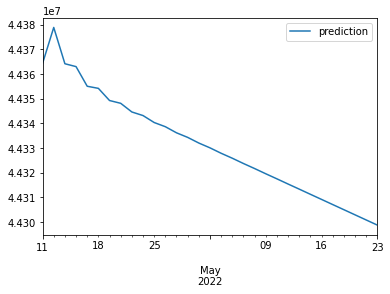

In [25]:

prediction.plot(legend = True,label = 'prediction')

In [26]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
mape = mean_absolute_percentage_error(test, pred)
mse = mean_squared_error(test, pred)
rmse = np.sqrt(mse)

print(f"MAPE: {mape * 100:.2f}%")
print(f"RMSE: {rmse:.2f}")

MAPE: 16.27%
RMSE: 8727545.10
